In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
iris = load_iris()

iris_scaled = StandardScaler().fit_transform(iris.data)

In [4]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target) #LDA는 지도학습이므로, 클래스의 결정값이 필요(PCA는 비지도학습)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


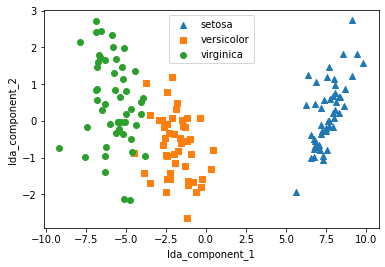

In [5]:
lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target


markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()